# Feuille de TP7 - Triangle de Sierpinski

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Le triangle de Sierpinski est une fractale dont des approximations arbitrairement proches peuvent être onbtenues de la manière récurrente par l'algorithme suivant :
1. Commencer à partir d'un triangle quelconque du plan. (Le triangle canonique de Sierpinski se construit à partir d'un triangle équilatéral ayant une base parallèle à l'axe des abscisses.)
2. Tracer les trois segments qui joignent deux à deux les milieux des côtés du triangle, ce qui délimite 4 nouveaux triangles.
3. Recommencer à la deuxième étape avec chacun des trois petits triangles de coin obtenus.

<img src="sierpinski.png"/>

Par la suite, nous allons construire cette fractale en partant d'un triangle équilatéral de base horizontale, comme sur l'exemple ci-dessus.

## Pour commencer

**Question 1**
Contruire à tableau `triangle0` de dimension 2, à 2 lignes et 3 colonnes tel que :
$$ triangle0 = \begin{pmatrix} A_x & B_X & C_x \\ A_y & B_y & C_y \end{pmatrix}$$
où $(A_x ; A_y)$ sont les coordonnées de $A$ et idem pour $B$ et $C$.

In [24]:
def triangle0(A, B, C):
    triangle = np.empty((2,3))
    triangle[:,0] = A
    triangle[:,1] = B
    triangle[:,2] = C
    return triangle

In [26]:
print(triangle0((0,0),(1,1),(2,2)))

[[0. 1. 2.]
 [0. 1. 2.]]


**Question 2**
+ Ecrire une fonction `dessine_triange` qui prend en argument un axe `ax`, un tableau `triangle` de profil (2,3) et qui dessine le triangle représenté par le tableau triangle. 
+ Testez la fonction avec `triangle0`

In [159]:
def dessine_triange(ax, triangle):
    triangle_copy=np.copy(triangle)
    idx = triangle.shape[0] +1
    new_col = np.array([triangle[0,0], triangle[1,0]])
    triangle_copy = np.insert(triangle_copy, idx, new_col, axis=1)
    #print(triangle_copy)
    ax.plot(triangle_copy[0], triangle_copy[1])

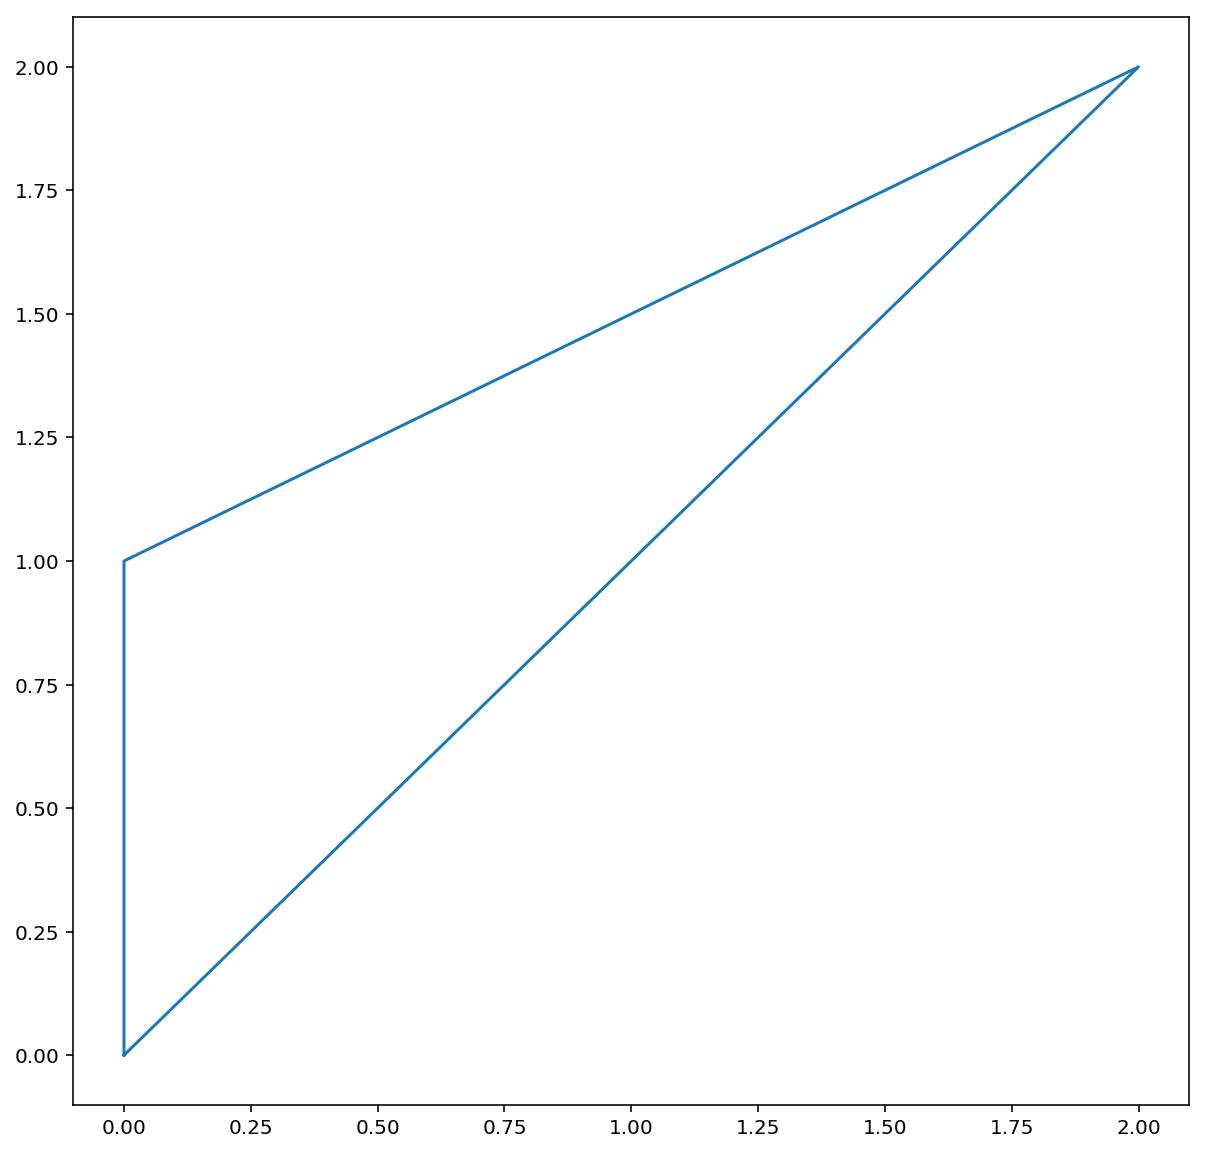

In [160]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
res = triangle0((0,0),(0,1),(2,2))
dessine_triange(ax, res)

In [161]:
res = triangle0((0,0),(1,1),(2,2))
print(res)
new_col = np.array([0, 0])
np.insert(res, 3, new_col, axis=1)

[[0. 1. 2.]
 [0. 1. 2.]]


array([[0., 1., 2., 0.],
       [0., 1., 2., 0.]])

## Pour passer de l'étape 0 à l'étape 1

**Question 3**

Soit `triangle` un tableau représentant un triangle ABC.
Ecrire une fonction `sous_triangle` qui :
+ prend en argument d'entrée un tableau de taille (2,3) `triangle`,
+ calcule les milieux $d$, $e$ et $f$ de chaque côté du triangle tels que 
    + $d$ soit le milieu de $CA$,
    + $e$ soit le milieu de $AB$,
    + $f$ soit le milieu de $BC$,
+ renvoie trois tableaux `tri1`, `tri2` et `tri3` tels que (attention à l'ordre des points !) :
    + `tri1` représente le triangle $Aed$,
    + `tri2` représente le triangle $eBf$,
    + `tri3` représente le triangle $dfC$,

In [162]:
def sous_triangle(triangle):
    #d = numpy.linalg.norm(triangle[:,0]+triangle[:,2])
    d = np.empty((1,2))
    e = np.empty((1,2))
    f = np.empty((1,2))

    d[0,0] = (triangle[0,2]+triangle[0,0])/2
    d[0,1] = (triangle[1,2]+triangle[1,0])/2
    e[0,0] = (triangle[0,0]+triangle[0,1])/2
    e[0,1] = (triangle[1,0]+triangle[1,1])/2    
    f[0,0] = (triangle[0,1]+triangle[0,2])/2
    f[0,1] = (triangle[1,1]+triangle[1,2])/2
    
    tri1 = triangle0(triangle[:,0], e,d)
    tri2 = triangle0(e, triangle[:,1],f)
    tri3 = triangle0(d, f, triangle[:,2])

    return tri1, tri2, tri3

In [163]:
res = triangle0((0,0),(3,3),(1.5,3))
d = np.linalg.norm(res[:,2]-res[:,1])
print(res[:,2])
print(d)
print(np.sqrt(3))

[1.5 3. ]
1.5
1.7320508075688772


## Construction finale

**Question 4**

Appelez la fonction `sous_triangle` sur `triangle0` puis sur chacun des trois triangles que la fonction va renvoyer. Tracez les triangles obtenus. Que remarquez-vous ?

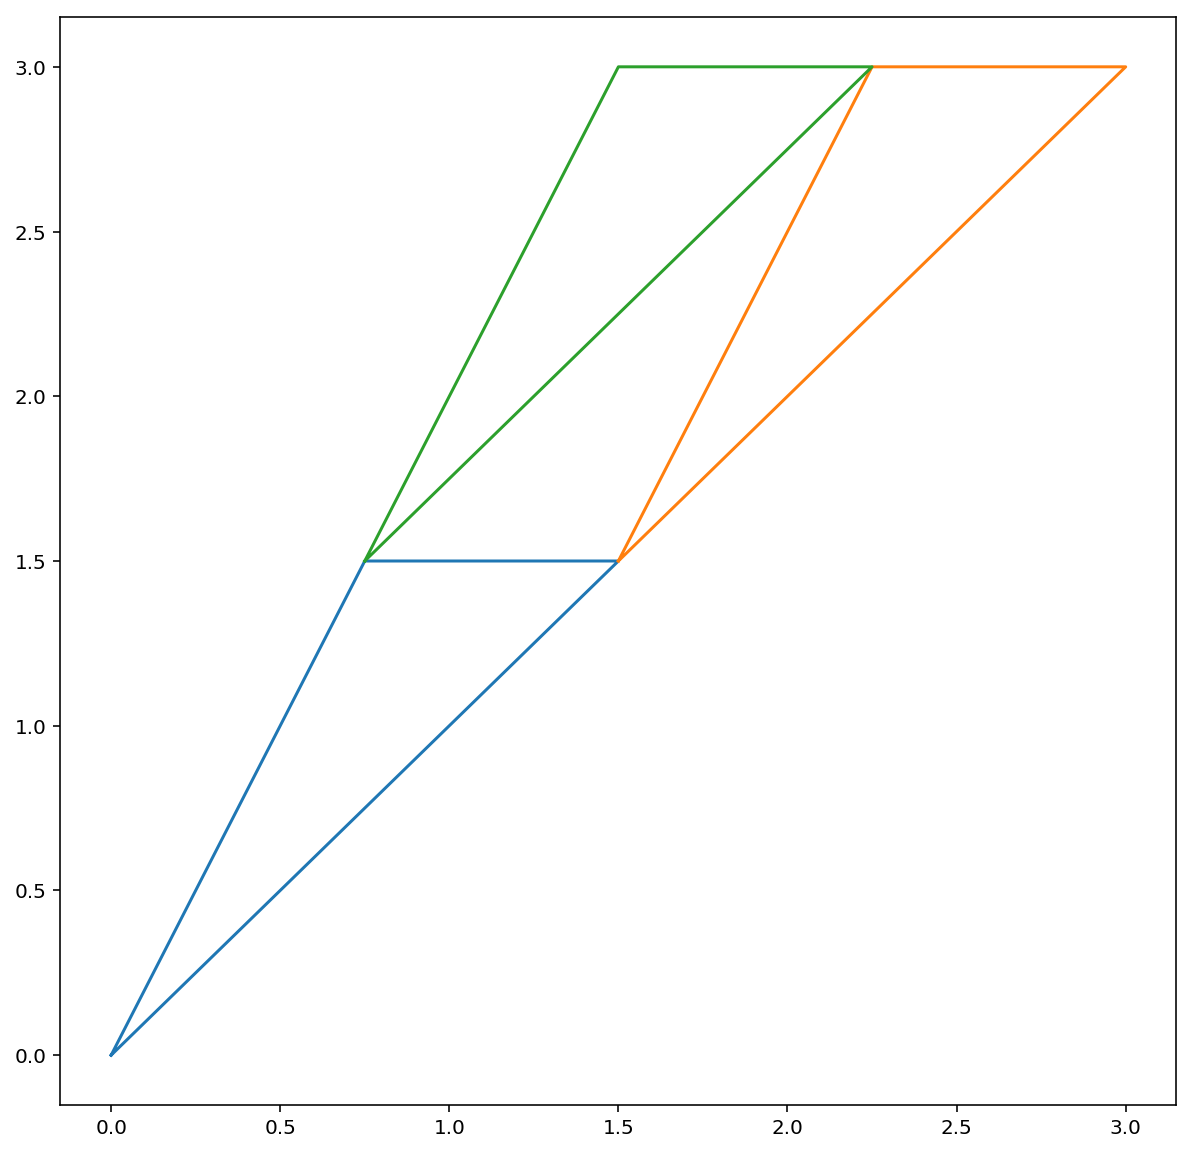

In [164]:
res = triangle0((0,0),(3,3),(1.5,3))
tab = sous_triangle(res)
fig, ax = plt.subplots(1,1,figsize=(10,10))
for v in tab:
     dessine_triange(ax, v)

**Question 5**

Construire le triangle final en créant une fonction `sierpinsky` qui :
> prend en argument un entier $n$,
> crée uen figure et un axe,
> dessine le triangle de Sierpinsky au bout de n itérations.
    
On pourra commencer par tester cette fonction pour $n$ petit ($n$=5 par exemple).

In [165]:
def sierpinsky(n, ax, triangle):
    if(n>0):
        tab = sous_triangle(triangle)
        for v in tab:
            dessine_triange(ax, v)
            sierpinsky(n-1,ax,v)
            
    

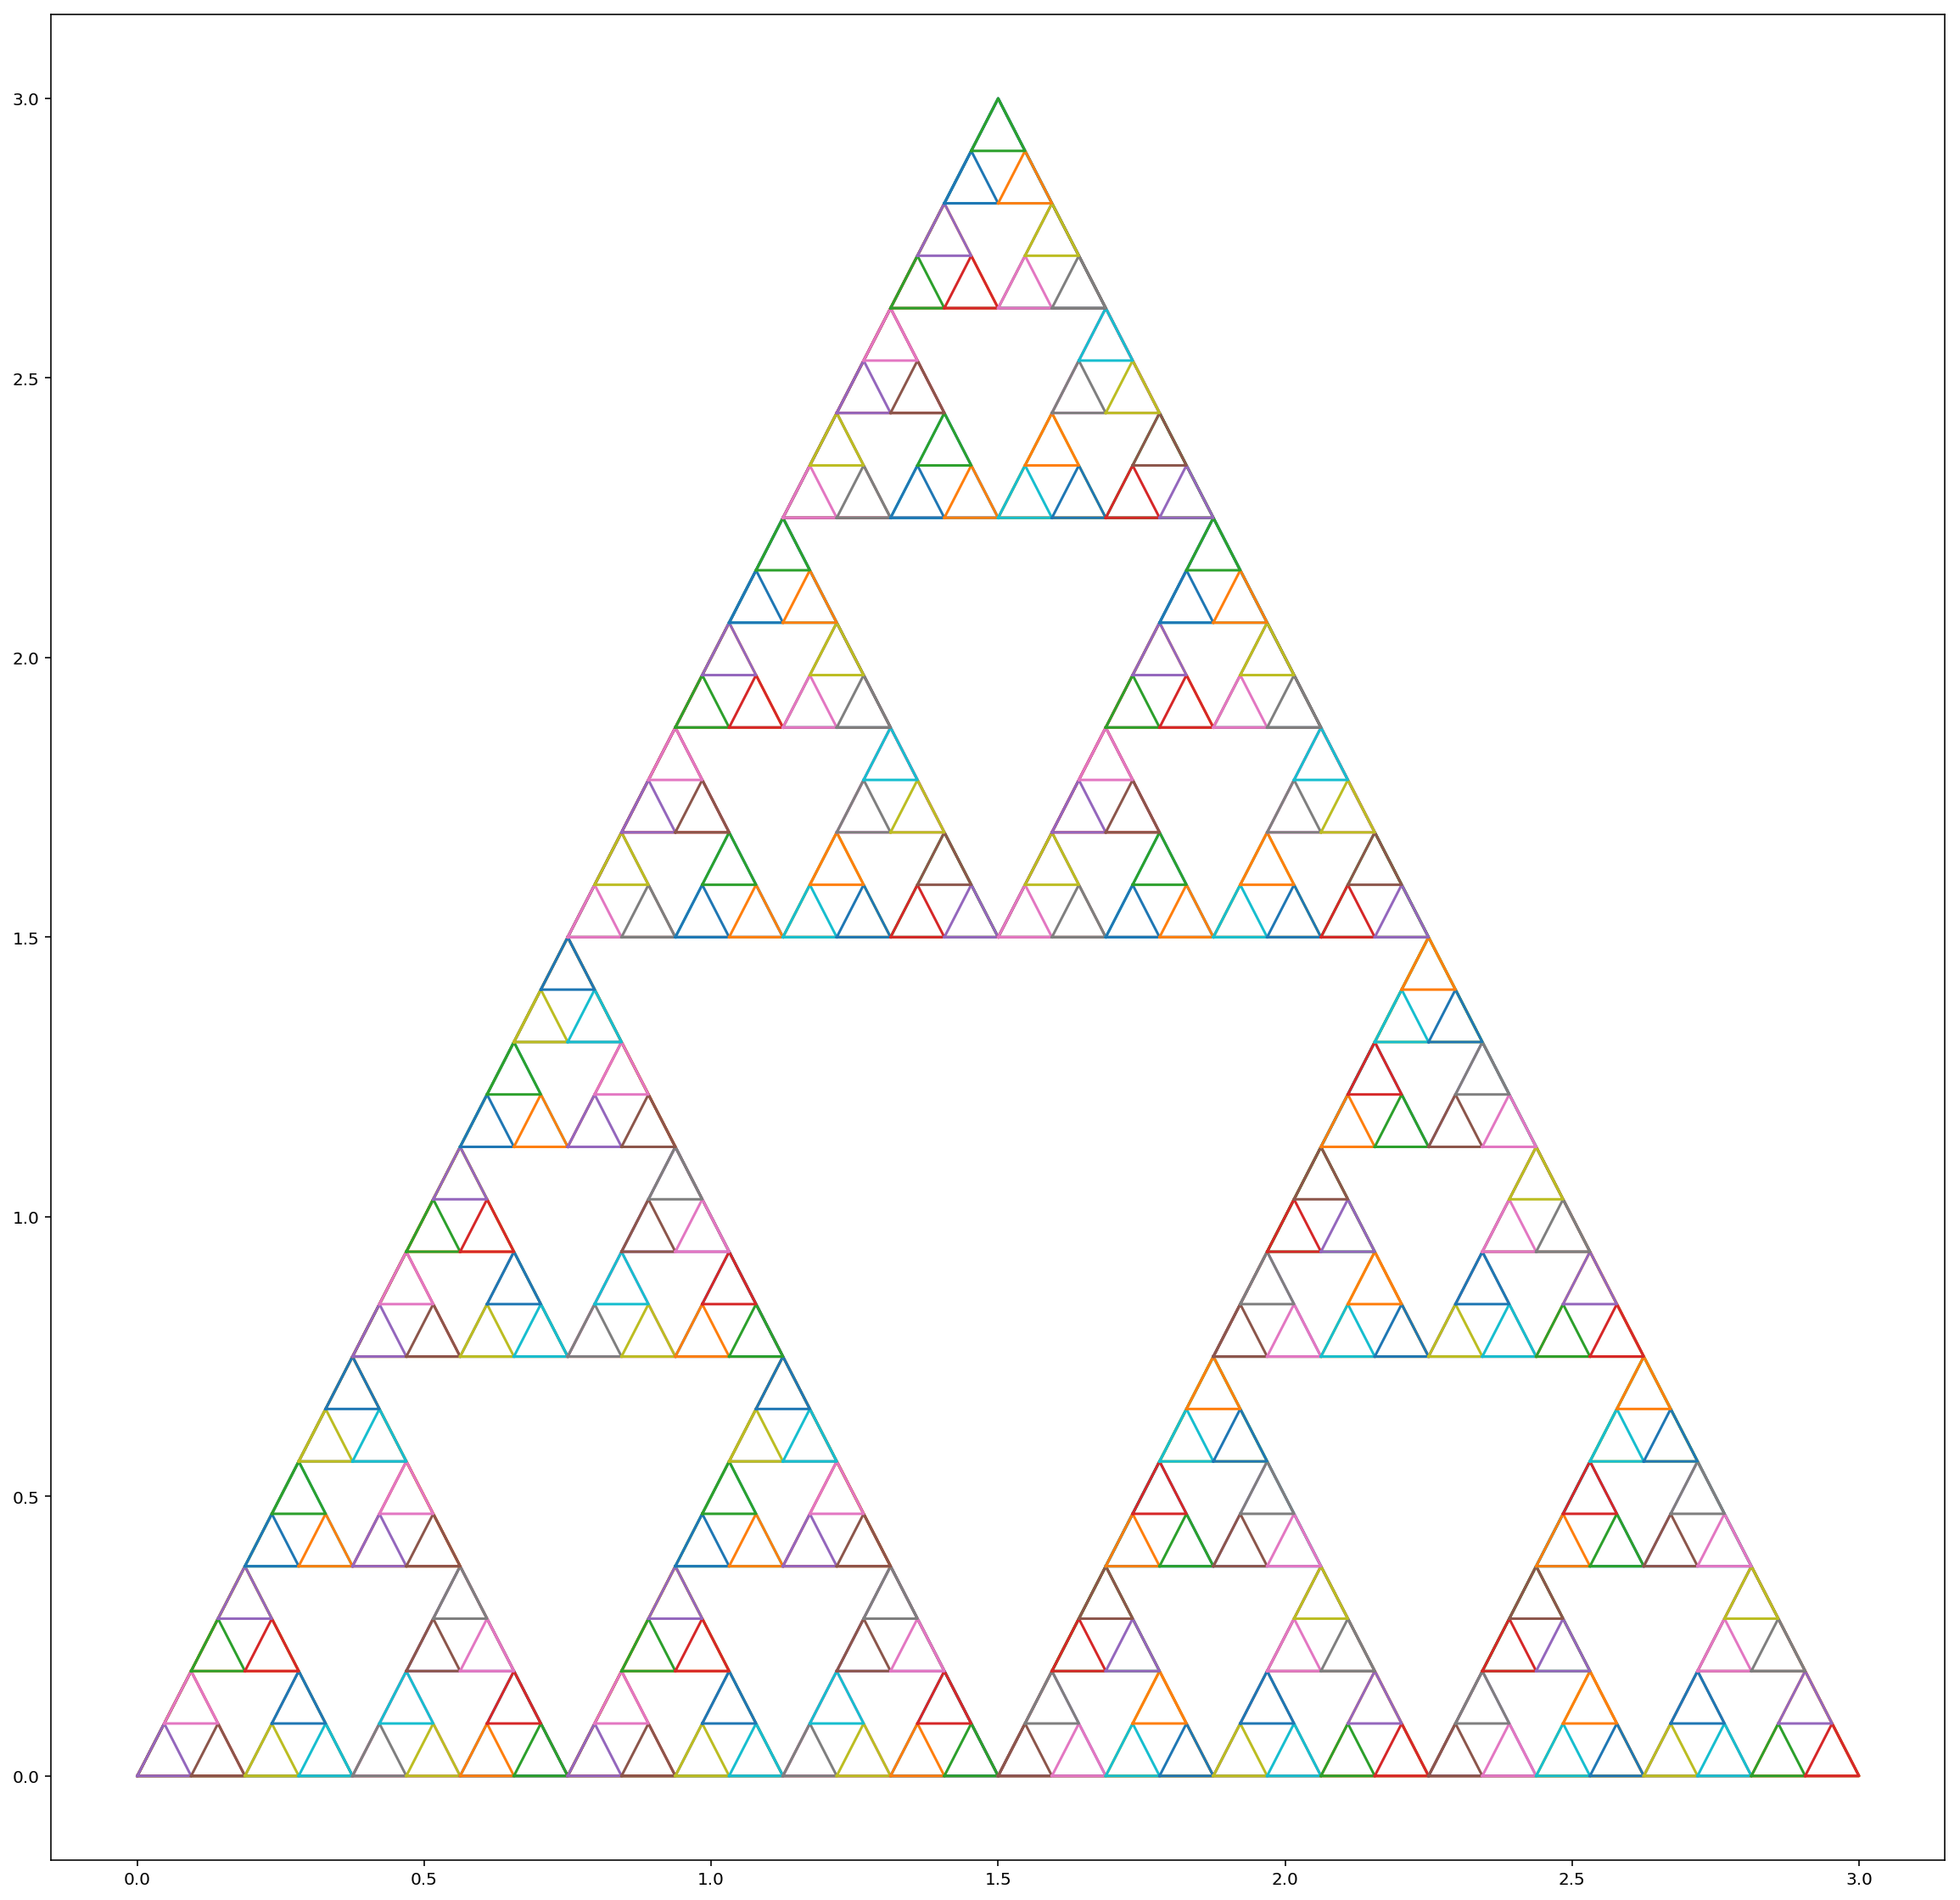

In [169]:
res = triangle0((0,0),(3,0),(1.5,3))
tab = sous_triangle(res)
fig, ax = plt.subplots(1,1,figsize=(20,20))
sierpinsky(5,ax,res)